# Proyek Analisis Data: Bike Sharing Data
- **Nama:** Dhissa Ashila Rosmalia
- **Email:** dhissa.ar@gmail.com
- **ID Dicoding:** dhissa_ashila

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah rata-rata peminjaman sepeda per jamnya?
- Apakah terdapat perbedaan dalam pola peminjaman sepeda pada hari libur dan hari kerja?
- Bagaimana pengaruh musim terhadap peminjaman sepeda?
- Bagaimana kondisi cuaca memengaruhi pola peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada section ini dilakukan gathering data yang bertujuan untuk mengetahui informasi dari data yang digunakan

In [36]:
days_df = pd.read_csv("https://raw.githubusercontent.com/dhissa/bikesharingdata/refs/heads/main/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/dhissa/bikesharingdata/refs/heads/main/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan data yang ditampilkan, dapat dilihat bahwa data days_df yang akan digunakan memiliki 17 kolom, sedangkan pada data hours_df yang akan digunakan terdapat 18 kolom, dengan informasi data yang diwakilkan pada 5 baris awal

### Assessing Data

Assesing data dilakukan untuk menilai data yang digunakan untuk menentukan kualitas, relevansi, dan kegunaan untuk menganalisis data dengan tujuan yang telah ditentukan

In [38]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi pada data yang digunakan

In [41]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [42]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [43]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


tidak terdapat duplikasi pada data yang digunakan

In [45]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari data yang digunakan, dapat diperhatikan bahwa tidak terdapat kesalahan atau keanehan pada hasil yang didapatkan.
- Pada data yang digunakan tidak terdapat duplikasi
- Kolom data yang terdapat pada days_df dan hours_df memiliki data yang sama, hanya saja pada hours_df terdapat data jumlah jam yang digunakan

### Cleaning Data
Bagian ini bertujuan untuk memastikan bahwa dataset yang digunakan akurat, konsisten, dan siap untuk dianalisis

In [46]:
#Mengubah beberapa detail kolom pada days_df
days_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum' : 'humidity',
    'cnt': 'count'
}, inplace=True)

days_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


mengubah detail data pada kolom agar lebih jelas, seperti mengubah 'dteday' menjadi 'dateday', 'yr'menjadi 'year' 'mnth'menjadi 'month', 'weathersit'menjadi 'weather_condition', 'hum' menjadi 'humidity', 'cnt'menjadi'count', serta ditampilkan hasil dari perubahan detail kolomnya

In [47]:
#Mengubah beberapa detail tentang kolom pada hours_df
hours_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum':'humidity',
    'cnt': 'count',
    'hr' : 'hour'
}, inplace=True)

hours_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


mengubah detail data pada kolom agar lebih jelas, seperti mengubah 'dteday' menjadi 'dateday', 'yr'menjadi 'year' 'mnth'menjadi 'month', 'weathersit'menjadi 'weather_condition', 'hum' menjadi 'humidity', 'cnt'menjadi'count', 'hr' menjadi 'hour' serta ditampilkan hasil dari perubahan detail kolomnya

In [48]:
# Mengubah angka pada days_df menjadi keterangan
days_df['season'] = days_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
days_df['month'] = days_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                         7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
days_df['weekday'] = days_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
days_df['weather_condition'] = days_df['weather_condition'].map({1: 'Clear', 2: 'Misty/Cloudy', 
                                                                 3: 'Light Snow/Rain', 4: 'Snow + Fog'})

Mengubah angka pada dataframe yang digunakan menjadi keterangan yang mewakilkan pada setiap kolom

In [49]:
# Mengubah angka pada hours_df menjadi keterangan
hours_df['season'] = hours_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hours_df['month'] = hours_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                         7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
hours_df['weekday'] = hours_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hours_df['weather_condition'] = hours_df['weather_condition'].map({1: 'Clear', 2: 'Misty/Cloudy', 
                                                                 3: 'Light Snow/Rain', 4: 'Snow + Fog'})

Mengubah angka pada dataframe yang digunakan menjadi keterangan yang mewakilkan pada setiap kolom

In [50]:
# Mengubah tipe data ke datetime
days_df['dateday'] = pd.to_datetime(days_df.dateday)

# Mengubah tipe data ke categorical
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
for column in columns:
    days_df[column] = days_df[column].astype('category')

days_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [51]:
# Mengubah tipe data ke datetime
hours_df['dateday'] = pd.to_datetime(hours_df.dateday)

# Mengubah tipe data ke categorical
columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
for column in columns:
    hours_df[column] = hours_df[column].astype('category')

hours_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dateday            731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [53]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   dateday            17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

**Insight:**
- Mengubah beberapa detail kolom data untuk penamaan yang lebih jelas
- Mengubah angka pada data berdasarkan keterangan nama kolom yang bersesuaian

## Exploratory Data Analysis (EDA)

### Explore Data Berdasarkan Pertanyaan Bisnis
- Bagaimana jumlah rata-rata peminjaman sepeda per jamnya?
- Apakah terdapat perbedaan dalam pola peminjaman sepeda pada hari libur dan hari kerja?
- Bagaimana pengaruh musim terhadap peminjaman sepeda?
- Bagaimana kondisi cuaca memengaruhi pola peminjaman sepeda?

**Explore data keseluruhan**

In [54]:
hours_df.describe(include='all')

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,Jul,NaN,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan statistik yang ditunjukkan di atas, jumlah peminjaman sepeda yang tersimpan adalah **17.379** dengan rata-rata peminjaman per hari adalah **189.463**

**Explore Data Per jam**

In [55]:
hours_df.groupby(by='hour').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

count                         
       min  max        mean     sum
hour                               
0        2  283   53.898072   39130
1        1  168   33.375691   24164
2        1  132   22.869930   16352
3        1   79   11.727403    8174
4        1   28    6.352941    4428
5        1   66   19.889819   14261
6        1  213   76.044138   55132
7        1  596  212.064649  154171
8        5  839  359.011004  261001
9       14  426  219.309491  159438
10       8  539  173.668501  126257
11      10  663  208.143054  151320
12       3  776  253.315934  184414
13      11  760  253.661180  184919
14      12  750  240.949246  175652
15       7  750  251.233196  183149
16      11  783  311.983562  227748
17      15  976  461.452055  336860
18      23  977  425.510989  309772
19      11  743  311.523352  226789
20      11  567  226.030220  164550
21       6  584  172.314560  125445
22       9  502  131.335165   95612
23       2  256   87.831044   63941

Berdasarkan hasil tersebut, diketahui bahwa pada jam **17.00** merupakan waktu terbanyak peminjaman sepeda dengan rata- rata peminjaman sekitar **461,45**

**Explore Data Per Hari**

In [56]:
hours_df.groupby(by='weekday').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_5212\3545501550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='weekday').agg({


count                         
          min  max        mean     sum
weekday                               
Fri         1  957  196.135907  487790
Mon         1  968  183.744655  455503
Sat         1  783  190.209793  477807
Sun         1  776  177.468825  444027
Thu         1  976  196.436665  485395
Tue         1  970  191.238891  469109
Wed         1  977  191.130505  473048

Berdasarkan hasil tersebut, diketahui bahwa pada hari **Kamis** merupakan hari yang memiliki rata-rata peminjaman sepeda paling banyak, yaitu sekitar **196.4**

**Explore Data Cuaca**

In [57]:
hours_df.groupby(by='weather_condition').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_5212\2093189787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='weather_condition').agg({


count                          
                    min  max        mean      sum
weather_condition                                
Clear                 1  977  204.869272  2338173
Light Snow/Rain       1  891  111.579281   158331
Misty/Cloudy          1  957  175.165493   795952
Snow + Fog           23  164   74.333333      223

Berdasarkan hasil tersebut, pada cuaca **cerah** atau **clear** memiliki rata-rata peminjaman sepeda paling banyak, yaitu sekitar **204,86**

**Explore Data Musim**

In [58]:
hours_df.groupby(by='season').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

C:\Users\HP\AppData\Local\Temp\ipykernel_5212\1076390714.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='season').agg({


count                          
         min  max        mean      sum
season                                
Fall       1  977  236.016237  1061129
Spring     1  801  111.114569   471348
Summer     1  957  208.344069   918589
Winter     1  967  198.868856   841613

Berdasarkan hasil tersebut, diketahui bahwa pada musim **Gugur** atau **Fall** memiliki jumlah rata-rata peminjaman terbanyak, yaitu sekitar 236.01

**Insight:**
- Dari hasil eksplorasi data, kita dapat mengetahui detail dari kolom data yang dianalisis
- Kita dapat mengetahui jumlah minimun, maximum, rata-rata, dan jumlah keselurahan yang dapat membantu untuk menganalisis data lebih lanjut

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah rata-rata peminjaman sepeda per jamnya?

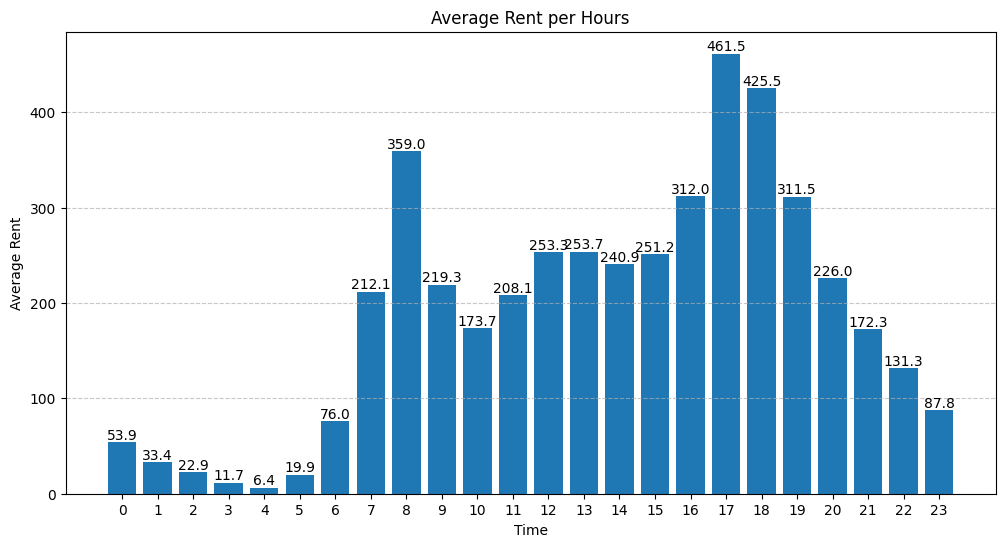

In [59]:
#Plot visualisasi data untuk jumlah rata-rata peminjaman per jam
rent_hours = hours_df.groupby('hour')['count'].mean()

plt.figure(figsize=(12, 6))
plt.bar(rent_hours.index, rent_hours.values, color='#1f77b4')

plt.title('Average Rent per Hours')
plt.xlabel('Time')
plt.ylabel('Average Rent')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(rent_hours.values):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.show()

Dari visualisasi data yang ditampilkan, dapat diketahui bahwa jumlah rata-rata peminjaman sepeda tertinggi adalah pada jam **17.00** dan pada jam **18.00** juga terbilang tinggi, sedangkan pada jam **04.00** jumlah rata-rata peminjaman menunjukan angka yang paling kecil

### Pertanyaan 2: Apakah terdapat perbedaan dalam pola peminjaman sepeda pada hari biasa dan akhir pekan?

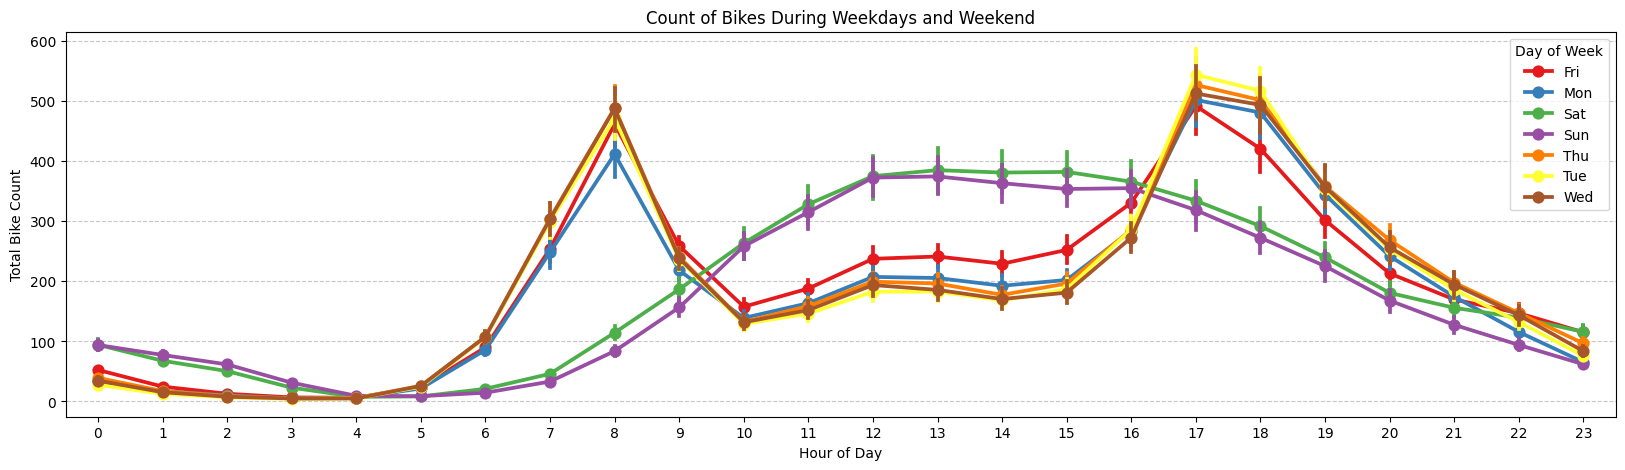

In [60]:
#Plot visualisasi data berdasarkan pola peminjaman pada hari biasa dan akhir pekan
fig, ax = plt.subplots(figsize=(20, 5))

sns.pointplot(
    data=hours_df, 
    x='hour', 
    y='count', 
    hue='weekday', 
    ax=ax,
    palette='Set1' 
)

ax.set(title='Count of Bikes During Weekdays and Weekend', xlabel='Hour of Day', ylabel='Total Bike Count')
ax.legend(title='Day of Week', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(range(24))
plt.show()

Dari visualisasi data yang ditampilkan, diketahui bahwa pada pukul **08.00** dan **17.00** adalah peminjaman paling banyak pada hari kerja, hal tersebut menunjukkan bahwa penggunaan sepeda paling banyak di jam tersebut. Serta, pada weekend peminjaman terjadi paling banyak pada waktu siang hari mulai pukul **12.00 - 16.00**.

### Pertanyaan 3: Bagaimana pengaruh musim terhadap peminjaman sepeda?

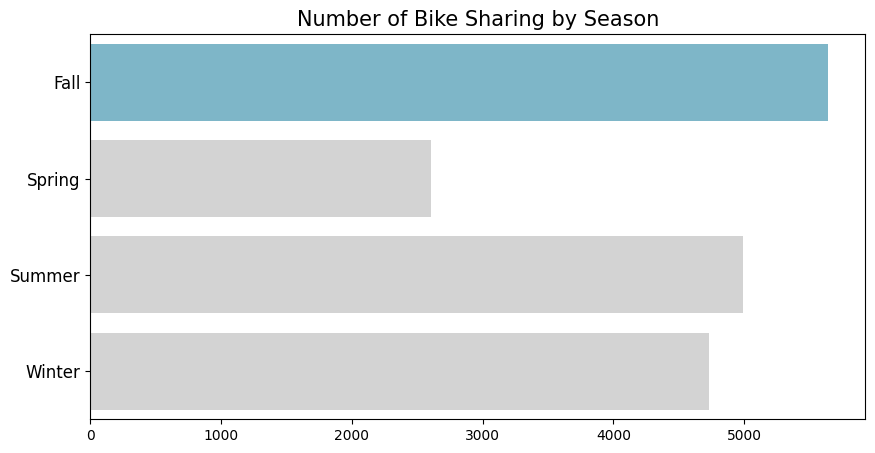

In [61]:
#Plot visualisasi data peminjaman berdasarkan pengaruh musim
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="count", 
    y="season",
    hue='season',
    data=days_df.sort_values(by="count", ascending=False),
    palette=colors_,
    errorbar=None
)

plt.title("Number of Bike Sharing by Season", loc="center", fontsize=15)
plt.ylabel("Season")
plt.xlabel("Count")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan hasil tersebut, dapat diketahui bahwa peminjaman sepeda paling banyak dilakukan saat musim **Gugur** atau **Fall** dengan jumlah peminjaman yang tidak terlalu jauh dari musim Dingin atau Winter dan musim Panas atau Summer.

### Pertanyaan 4: Bagaimana kondisi cuaca memengaruhi pola peminjaman sepeda?

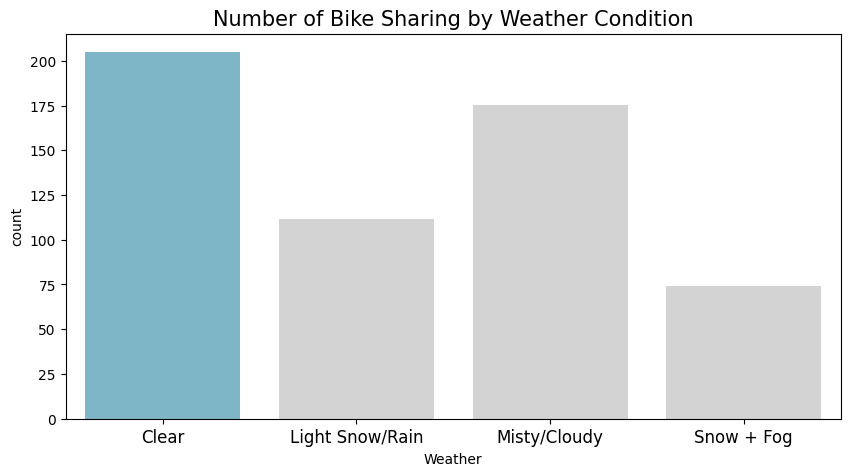

In [62]:
#Plot visualisasi data untuk pengaruh kondisi cuaca
plt.figure(figsize=(10,5))

sns.barplot(
    y='count',
    x='weather_condition',
    hue='weather_condition',
    data=hours_df.sort_values(by='count', ascending=False),
    palette=colors_,
    errorbar=None
)

plt.title("Number of Bike Sharing by Weather Condition", loc="center", fontsize=15)
plt.ylabel("count")
plt.xlabel("Weather")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan hsil tersebut, diketahui bahwa pada cuaca **cerah** atau **clear** peminjaman sepeda memiliki jumlah yang paling banyak

**Insight:**
- Visualisasi data digunakan untuk memudahkan audiens dalam membaca data yang ditampilkan
- Dari hasil visualisasi tersebut dapat dianalisis bagaimana hubungan setiap variabel yang dianalisis

## Conclusion

**Bagaimana jumlah rata-rata peminjaman sepeda per jamnya?**
- Berdasarkan hasil visualisasi data yang didapatkan, kita dapat mengetahui bagaimana tren rata-rata peminjaman sepeda per jamnya, untuk jumlah rata-rata peminjaman paling banyak adalah pada pukul **17.00** lalu juga pada pukul **18.00** rata-rata peminjaman masih terbilang tinggi, sedangkan waktu yang memiliki jumlah peminjaman sepeda paling sedikit adalah pada pukul **04.00**.

**Apakah terdapat perbedaan dalam pola peminjaman sepeda pada hari libur dan hari kerja?**
- Terlihat bahwa terdapat pola peminjaman sepeda pada hari libur dan hari kerja, dimana pada hari kerja waktu yang memiliki jumlah peminjaman sepeda paling banyak adalah pada pukul **08.00** dan **17.00**, sedangkan pada hari libur, jumlah peminjaman sepeda paling banyak adalah pada siang hari sekitar **12.00 - 16.00**.

**Bagaimana pengaruh musim terhadap peminjaman sepeda?**
- Terjadi pengaruh dalam peminjaman sepeda berdasarkan keadaan musim, pada musim **Gugur** peminjaman sepeda memiliki jumlah yang paling banyak, walaupun data yang ditunjukkan pada musim dingin dan musim panas masih terbilang cukup tinggi juga.

**Bagaimana kondisi cuaca memengaruhi pola peminjaman sepeda?**
- Kondisi cuaca mempengaruhi pola peminjaman sepeda, pada cuaca **cerah** peminjaman sepeda memiliki jumlah yang paling banyak, kemudia disusul cuaca berawan, peminjaman sepeda cukup sedikit pada cuaca hujan, serta jumlah yang paling sedikit adlah pada kondisi bersalju.